# Sweet n Sour Sentiment on the Street
Georgia Tech Data Science Bootcamp - Cohort 6
Final Project
Team Members:
* Joseph Ayala
* Andrew Behrman
* Michael Fox
* Michael Hankinson

### Regression Analysis

#### This notebook is designed to run a multi-variate regression analysis on the various ticker features and determine which is most influential

In [1]:
import pandas as pd


In [18]:
df = pd.read_csv('../db/final_complete_prob_merged_dataset.csv', sep='|')
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'call_datetime', 'Unnamed: 0_x', 'id',
       'sentiment', 'sentence', 'ticker', 'call_title', 'speaker',
       'call_section', 'vader_sentiment', 'call_date', 'call_time',
       'unique_id', 'base_date', 'next_date', 'base_close', 'base_volume',
       'next_close', 'next_volume', 'Unnamed: 0_y', 'marketCap',
       'percent_change_price', 'percent_change_volume', 'prob_1', 'prob_2',
       'prob_3', 'prob_4', 'prob_5'],
      dtype='object')

In [19]:
df['binary_price_change'] = df['percent_change_price'].apply(lambda x: 1 if (x > 0) else 0)
#df['sentiment'] = df['model_results']
df.head()

,Unnamed: 0,Unnamed: 0.1,call_datetime,Unnamed: 0_x,id,sentiment,sentence,ticker,call_title,speaker,...,Unnamed: 0_y,marketCap,percent_change_price,percent_change_volume,prob_1,prob_2,prob_3,prob_4,prob_5,binary_price_change
0,0,0,2019-11-01 10:00:00,457,457,NaN,Good morning and welcome to the Dominion Ener...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,D,67584167936,0.872191,30.759076,0.004606,0.093423,0.601783,0.295546,0.004643,1
1,1,1,2019-11-01 10:00:00,458,458,NaN,"At this time, each of your lines is in a liste...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,D,67584167936,0.872191,30.759076,0.005961,0.106496,0.490910,0.266511,0.130122,1
2,2,2,2019-11-01 10:00:00,459,459,NaN,"At the conclusion of today’s presentation, we ...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,D,67584167936,0.872191,30.759076,0.000094,0.001007,0.966405,0.001552,0.030943,1
3,3,3,2019-11-01 10:00:00,460,460,NaN,[Operator Instructions] I would now like to tu...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,D,67584167936,0.872191,30.759076,0.003702,0.397657,0.356262,0.238194,0.004186,1
4,4,4,2019-11-01 10:00:00,461,461,NaN,Good morning and welcome.,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Steven Ridge,...,D,67584167936,0.872191,30.759076,0.018390,0.096235,0.875084,0.004576,0.005715,1


In [20]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,id,sentiment,vader_sentiment,base_close,base_volume,next_close,next_volume,marketCap,percent_change_price,percent_change_volume,prob_1,prob_2,prob_3,prob_4,prob_5,binary_price_change
count,42941.000000,42941.000000,42941.000000,42941.000000,0.0,42941.000000,42941.000000,4.294100e+04,42941.000000,4.294100e+04,4.294100e+04,42941.000000,42941.000000,4.294100e+04,42941.000000,42941.000000,42941.000000,4.294100e+04,42941.000000
mean,21470.000000,23556.465895,18447.076407,18447.076407,NaN,0.259800,143.517541,6.102612e+06,139.942650,1.319834e+07,5.101830e+10,-0.341603,98.786692,3.101575e-02,0.091547,0.645812,0.208247,2.337877e-02,0.539415
std,12396.143291,16081.709925,12520.269232,12520.269232,NaN,0.330205,265.461199,1.140393e+07,246.591195,2.933328e+07,6.092187e+10,5.707717,127.013049,6.433447e-02,0.101927,0.225621,0.176840,4.409765e-02,0.498450
min,0.000000,0.000000,0.000000,0.000000,NaN,-0.949300,9.070000,2.280000e+05,10.110000,4.135000e+05,5.205218e+09,-20.808657,-30.405860,1.280586e-38,0.000000,0.000060,0.000000,3.694907e-26,0.000000
25%,10735.000000,10735.000000,6440.000000,6440.000000,NaN,0.000000,42.650002,1.473700e+06,43.680000,2.355400e+06,1.279713e+10,-3.140449,30.741410,6.691983e-04,0.016925,0.488184,0.063575,2.928690e-03,0.000000
50%,21470.000000,21470.000000,17778.000000,17778.000000,NaN,0.273200,82.730003,2.525500e+06,84.559998,4.400500e+06,2.386513e+10,0.439476,65.650464,8.669156e-03,0.069939,0.622841,0.193133,1.103562e-02,1.000000
75%,32205.000000,32205.000000,29037.000000,29037.000000,NaN,0.493900,141.029999,6.106800e+06,138.119995,1.070740e+07,5.688201e+10,2.937574,124.076569,3.216803e-02,0.125641,0.822480,0.302156,2.743177e-02,1.000000
max,42940.000000,64976.000000,40712.000000,40712.000000,NaN,0.993000,2012.089966,7.865600e+07,1849.930054,2.159434e+08,2.962090e+11,13.692753,771.327086,9.545830e-01,0.997667,1.000000,0.999922,9.813496e-01,1.000000


In [21]:
import pylab as pl
df['base_volume'].hist()
pl.title('Count of Sentences vs. Base Volume (Distribution)')
pl.show()
df['marketCap'].hist()
pl.title('Count of Sentences vs. Market Cap (Distribution)')
pl.show()
df['percent_change_price'].hist()
pl.title('Count of Sentences vs. Percent Price Change (Distribution)')
pl.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [22]:
grouped_df = df.groupby(by=['ticker','call_section']).agg({
    'prob_1' : "mean",
    'prob_2' : "mean",
    'prob_3' : "mean",
    'prob_4' : "mean",
    'prob_5' : "mean",
    'vader_sentiment': "mean",
   # 'kmeans_cluster': "mean",  ### FUTURE: Need to figure out how to get better kmeans cluster for group of sentences
    'marketCap': "mean",
    'base_volume': "mean",
    'percent_change_price': "mean",
    'binary_price_change': "mean"
})
#grouped_df = pd.DataFrame((group['sentiment','vader_sentiment','marketCap','base_volume','percent_change_price',
#                                 'binary_price_change']).mean())

grouped_df.head()


prob_1    prob_2    prob_3    prob_4    prob_5  \
ticker call_section                                                             
AAP    answer                0.030404  0.093395  0.633585  0.219271  0.023345   
       operator_instruction  0.022745  0.099500  0.672862  0.172496  0.032397   
       presentation          0.034960  0.117845  0.590526  0.232136  0.024533   
       question              0.030039  0.100459  0.655967  0.194754  0.018781   
ABBV   answer                0.037816  0.087827  0.621137  0.230806  0.022414   

                             vader_sentiment     marketCap  base_volume  \
ticker call_section                                                       
AAP    answer                       0.227533   11265734656    1805500.0   
       operator_instruction         0.070109   11265734656    1805500.0   
       presentation                 0.435914   11265734656    1805500.0   
       question                     0.132848   11265734656    1805500.0   
ABBV   answer                       0.233434  131067805696   10009400.0   

                             percent_change_price  binary_price_change  
ticker call_section                                                     
AAP    answer                           -7.510963                    0  
       operator_instruction             -7.510963                    0  
       presentation                     -7.510963                    0  
       question                         -7.510963                    0  
ABBV   answer                            2.765552                    1

In [23]:
grouped_df = grouped_df.reset_index()
grouped_df.head()

,ticker,call_section,prob_1,prob_2,prob_3,prob_4,prob_5,vader_sentiment,marketCap,base_volume,percent_change_price,binary_price_change
0,AAP,answer,0.030404,0.093395,0.633585,0.219271,0.023345,0.227533,11265734656,1805500.0,-7.510963,0
1,AAP,operator_instruction,0.022745,0.099500,0.672862,0.172496,0.032397,0.070109,11265734656,1805500.0,-7.510963,0
2,AAP,presentation,0.034960,0.117845,0.590526,0.232136,0.024533,0.435914,11265734656,1805500.0,-7.510963,0
3,AAP,question,0.030039,0.100459,0.655967,0.194754,0.018781,0.132848,11265734656,1805500.0,-7.510963,0
4,ABBV,answer,0.037816,0.087827,0.621137,0.230806,0.022414,0.233434,131067805696,10009400.0,2.765552,1


In [24]:
grouped_df.drop(columns='ticker',inplace=True)
grouped_df['call_section_codes'] = grouped_df['call_section'].astype('category').cat.codes
grouped_df.head()

,call_section,prob_1,prob_2,prob_3,prob_4,prob_5,vader_sentiment,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes
0,answer,0.030404,0.093395,0.633585,0.219271,0.023345,0.227533,11265734656,1805500.0,-7.510963,0,0
1,operator_instruction,0.022745,0.099500,0.672862,0.172496,0.032397,0.070109,11265734656,1805500.0,-7.510963,0,1
2,presentation,0.034960,0.117845,0.590526,0.232136,0.024533,0.435914,11265734656,1805500.0,-7.510963,0,2
3,question,0.030039,0.100459,0.655967,0.194754,0.018781,0.132848,11265734656,1805500.0,-7.510963,0,3
4,answer,0.037816,0.087827,0.621137,0.230806,0.022414,0.233434,131067805696,10009400.0,2.765552,1,0


In [25]:
target_df = df.groupby(by=['ticker']).agg({
    'percent_change_price': "mean",
    'binary_price_change': "mean"
})
#grouped_df = pd.DataFrame((group['sentiment','vader_sentiment','marketCap','base_volume','percent_change_price',
#                                 'binary_price_change']).mean())
target_df = target_df.reset_index()

In [26]:
up_down_group = target_df.groupby(by=['binary_price_change']).agg({'ticker': "count"})
up_down_df = pd.DataFrame(up_down_group)
up_down_df.head()

,ticker
binary_price_change,
0,37
1,45


In [27]:
grouped_df = pd.get_dummies(grouped_df, columns=['call_section'])
grouped_df.head()

,prob_1,prob_2,prob_3,prob_4,prob_5,vader_sentiment,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,call_section_presentation,call_section_question
0,0.030404,0.093395,0.633585,0.219271,0.023345,0.227533,11265734656,1805500.0,-7.510963,0,0,1,0,0,0
1,0.022745,0.099500,0.672862,0.172496,0.032397,0.070109,11265734656,1805500.0,-7.510963,0,1,0,1,0,0
2,0.034960,0.117845,0.590526,0.232136,0.024533,0.435914,11265734656,1805500.0,-7.510963,0,2,0,0,1,0
3,0.030039,0.100459,0.655967,0.194754,0.018781,0.132848,11265734656,1805500.0,-7.510963,0,3,0,0,0,1
4,0.037816,0.087827,0.621137,0.230806,0.022414,0.233434,131067805696,10009400.0,2.765552,1,0,1,0,0,0


*****
sklearn results:
Intercept: 
 [0.25460867]
Coefficients: 
 [[ 0.04557852  0.14727567 -0.26955249  0.0827311  -0.00605618]]
*****
Logistic Regression Accuracy: 0.5487804878048781


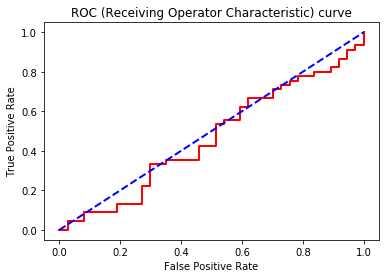

In [41]:
from pandas import DataFrame
from sklearn import linear_model
# train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from matplotlib import pyplot as plt


X = grouped_df.drop(columns=['vader_sentiment','percent_change_price','binary_price_change','call_section_codes',
                             'marketCap','base_volume',
                           #  'prob_3', #avoid collinearity
                             
                             'call_section_answer',
                            'call_section_operator_instruction',
                            'call_section_presentation', 'call_section_question'
                            
                        #   'vader_question', 'vader_answer','vader_operator','vader_presentation',
                        #   'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                        #    'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                        #     'base_volume','marketCap',
                    ]) # here we have variables for multiple regression. 

#Y = grouped_df['percent_change_price']
Y = grouped_df['binary_price_change']

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=1)

# with sklearn
#regr = linear_model.LinearRegression()
regr = linear_model.LogisticRegression(solver='saga',multi_class='multinomial')
regr.fit(X_train, y_train)

print('*****')
print('sklearn results:')
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('*****')
print(f'Logistic Regression Accuracy: {regr.score(X_test,y_test)}')

fpr, tpr, thresholds =roc_curve(y_test, regr.predict_proba(X_test)[:,1],drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiving Operator Characteristic) curve')
plt.show()

In [37]:
regr.predict_proba(X_test)[:,1]

array([0.544972  , 0.55669532, 0.5543516 , 0.55537792, 0.55540926,
       0.55538192, 0.54912927, 0.55408317, 0.54301051, 0.55762548,
       0.54305095, 0.54907087, 0.53884933, 0.55296869, 0.55688671,
       0.5547689 , 0.54256343, 0.55282288, 0.54842243, 0.54981378,
       0.55087465, 0.55323086, 0.55536605, 0.54985678, 0.55409827,
       0.55356627, 0.54227146, 0.55554184, 0.55139178, 0.54775927,
       0.55606195, 0.55612618, 0.55326803, 0.55449996, 0.54244743,
       0.55416345, 0.55143509, 0.54183072, 0.54666677, 0.53998884,
       0.55012677, 0.55851586, 0.55255496, 0.54738963, 0.55104203,
       0.56062557, 0.54976146, 0.55285241, 0.55098672, 0.54258374,
       0.54865441, 0.55478475, 0.54704152, 0.54566714, 0.55578041,
       0.55286702, 0.55488292, 0.55667857, 0.54730625, 0.55688167,
       0.5416468 , 0.54498552, 0.55668282, 0.55439572, 0.5576447 ,
       0.55177734, 0.55668867, 0.54359864, 0.55439877, 0.54160067,
       0.55570446, 0.54940223, 0.54778894, 0.550445  , 0.55623

Optimization terminated successfully.
         Current function value: 0.684733
         Iterations 4
*****
Columns: ['prob_1' 'prob_2' 'prob_4' 'prob_5']
                          Results: Logit
Model:              Logit               Pseudo R-squared: 0.005   
Dependent Variable: binary_price_change AIC:              340.7803
Date:               2019-11-21 12:40    BIC:              354.7526
No. Observations:   243                 Log-Likelihood:   -166.39 
Df Model:           3                   LL-Null:          -167.15 
Df Residuals:       239                 LLR p-value:      0.67936 
Converged:          1.0000              Scale:            1.0000  
No. Iterations:     4.0000                                        
--------------------------------------------------------------------
          Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
--------------------------------------------------------------------
prob_1     1.8171    14.8918    0.1220   0.9029   -27.3702   

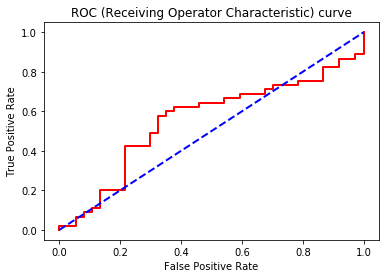

In [38]:
import statsmodels.api as sm
from matplotlib import pyplot as plt


logit_model=sm.Logit(y_train, X_train)
result=logit_model.fit()
print('*****')
print(f'Columns: {X.columns.values}')
print(result.summary2())


##Computing false and true positive rates
fpr, tpr, thresholds =roc_curve(y_test, result.predict(X_test),drop_intermediate=False)

plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiving Operator Characteristic) curve')
plt.show()



In [39]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, regr.predict(X_test))

0.5487804878048781

In [42]:
# append key figures to results dataframe
    # try random forest
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 200, random_state = 1)

# Train the model on training data
rf.fit(X_train, y_train)

print('*****')
print('Random Forest Accuracy of Predicting Positive/Negative price Change: ')
print(rf.score(X_test, y_test))

feature_importances = zip(X_test.columns, rf.feature_importances_)
sorted_features = sorted(feature_importances, key=lambda x: x[1],reverse=True)
print('*****')
print(sorted_features)
    


*****
Random Forest Accuracy of Predicting Positive/Negative price Change: 
0.5121951219512195
*****
[('prob_1', 0.21976024571910158), ('prob_2', 0.20146055337753405), ('prob_5', 0.1974859586093337), ('prob_3', 0.19298231333776317), ('prob_4', 0.18831092895626744)]
